In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# 각 주기에 5를 곱해서 short=60, long=130, t=45로 설정
# 매수매도가 빈번하게 생기는 것을 조정
def make_macd(df, short=12, long=26, t=9):
    '''
    데이터프레임을 받아
    ema_short, ema_long, MACD, signal, macdhist 값을 생성
    '''
    ema_short = df.Close.ewm(short).mean()
    ema_long = df.Close.ewm(long).mean()
    MACD = ema_short - ema_long
    signal = MACD.ewm(t).mean()
    macdhist = MACD - signal
    
    df= df.assign(
        ema_short=ema_short,
        ema_long=ema_long,
        MACD=MACD,
        signal=signal,
        macdhist=macdhist
    )
    
    return df

In [13]:
df = fdr.DataReader('252670', '2020')

df = make_macd(df)
df.tail()

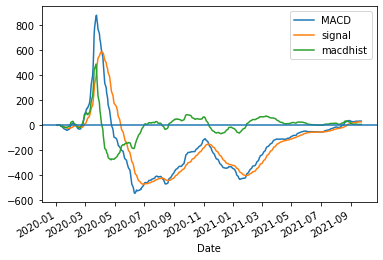

In [14]:
df[['MACD', 'signal', 'macdhist']].plot()
plt.axhline(0)

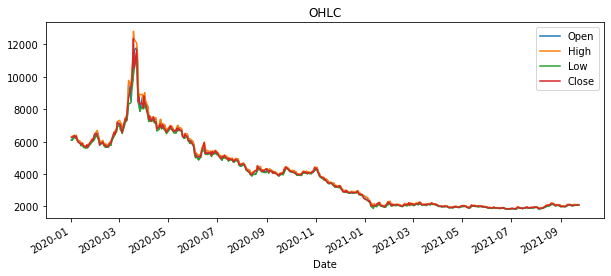

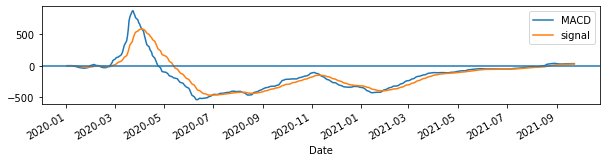

In [18]:
# 데이터가 시리즈면 겹쳐서 보이고 
# 데이터 프레임인 경우 따로 그린다

ohlc_col = ['Open', 'High', 'Low', 'Close']
df[ohlc_col].plot(figsize=(10,4), title='OHLC')
df[['MACD', 'signal']].plot(figsize=(10,2))
plt.axhline(0)

Text(0.5, 1.0, 'MACD')

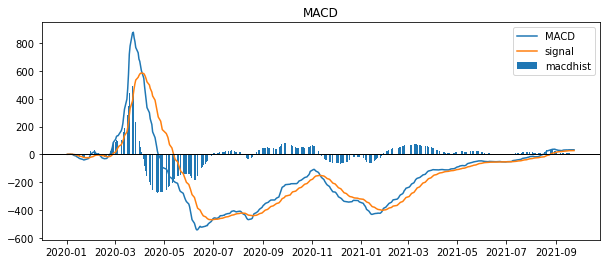

In [19]:
fig, axes = plt.subplots(figsize=(10,4))

plt.plot(df.index, df['MACD'], label='MACD')
plt.plot(df.index, df['signal'], label='signal')
plt.bar(df.index, df['macdhist'], label='macdhist')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.title('MACD')

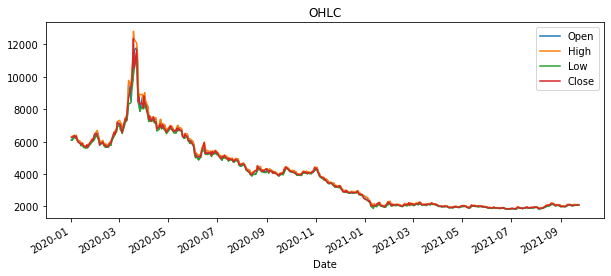

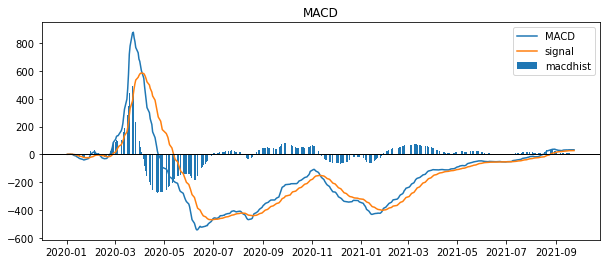

In [20]:
# 함수
def plot_macd(df):
    df = make_macd(df)
    df[ohlc_col].plot(figsize=(10,4), title='OHLC')
    
    fig, axes = plt.subplots(figsize=(10,4))

    plt.plot(df.index, df['MACD'], label='MACD')
    plt.plot(df.index, df['signal'], label='signal')
    plt.bar(df.index, df['macdhist'], label='macdhist')
    plt.axhline(0, c='k', lw=1)
    plt.legend(loc='best')
    plt.title('MACD')

plot_macd(df)